# Power Analysis

Using a simr to simulate our mixed effects model with the between-subjects factor condition assignment and within-subjects factor evidence level, what sample size do we need to achive $\beta=0.2$ given a [small-medium effect size](http://methods.sagepub.com/Reference//the-sage-encyclopedia-of-communication-research-methods/i4505.xml)? The effect size is given by the coefficient for the interaction of the condition assignment ($x_t$) and evidence level ($x_e$): $\beta x_tx_e, \beta=-0.2$. 

> power is simply the proportion of times that we are able to reject the null hypothesis (remembering that we control the population means and we know that there is a true difference)


In [47]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/mock_data/reshare_rates.csv")
data$ID <- rep(1:as.integer(nrow(data)/2), each=2)
head(data)

,PROLIFIC_ID,STUDY_ID,SESSION_ID,age,educationLevel,politicalAffiliation,attendsProtests,gender_female,gender_intersex,gender_male,⋯,socialMedias_tiktok,socialMedias_twitter,treatment,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion,ID
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,79,146,NA,right,0,0,0,1,⋯,0,1,Treatment,High,0.8000000,0.50,0.0,0.5000000,0.80,1
2,1,1,79,146,NA,right,0,0,0,1,⋯,0,1,Treatment,Low,0.2500000,1.00,0.0,0.3333333,0.25,1
3,2,1,28,100,NA,centreRight,0,1,0,0,⋯,0,1,Treatment,High,0.3333333,0.75,0.0,0.0000000,0.25,2
4,2,1,28,100,NA,centreRight,0,1,0,0,⋯,0,1,Treatment,Low,0.0000000,1.00,1.0,0.0000000,0.00,2
5,3,1,32,64,communityCollege,centreLeft,1,0,1,1,⋯,0,1,Treatment,High,0.5000000,0.00,0.0,1.0000000,1.00,3
6,3,1,32,64,communityCollege,centreLeft,1,0,1,1,⋯,0,1,Treatment,Low,0.0000000,0.50,0.5,1.0000000,0.00,3


In [48]:
library(simr)

md1 <- lmer(Affirms ~ treatment * evidence + (1 | PROLIFIC_ID), data = data)
summary(md1)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ treatment * evidence + (1 | PROLIFIC_ID)
   Data: data

REML criterion at convergence: 319.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2535 -0.6316 -0.0172  0.6759  2.2962 

Random effects:
 Groups      Name        Variance Std.Dev.
 PROLIFIC_ID (Intercept) 0.004761 0.0690  
 Residual                0.080942 0.2845  
Number of obs: 790, groups:  PROLIFIC_ID, 395

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.53570    0.02107  25.421
treatmentTreatment              0.11788    0.02947   4.000
evidenceLow                    -0.09066    0.02896  -3.130
treatmentTreatment:evidenceLow -0.23006    0.04050  -5.681

Correlation of Fixed Effects:
            (Intr) trtmnT evdncL
trtmntTrtmn -0.715              
evidenceLow -0.687  0.491       
trtmntTrt:L  0.491 -0.687 -0.715

In [49]:
fixef(md1)

(Intercept)             treatmentTreatment 
                    0.53569578                     0.11788154 
                   evidenceLow treatmentTreatment:evidenceLow 
                   -0.09066329                    -0.23006396

In [7]:
power <- powerSim(md1, 
                  test=fixed("treatmentTreatment:evidenceLow", "z"),
                  nsim=200,
                  progress=FALSE)

boundary (singular) fit: see ?isSingular

Warning message in observedPowerWarning(sim):
“This appears to be an "observed power" calculation”


In [8]:
print(power)

Power for predictor 'treatmentTreatment:evidenceLow', (95% confidence interval):
      100.0% (98.17, 100.0)

Test: z-test
      Effect size for treatmentTreatment:evidenceLow is -0.23

Based on 200 simulations, (0 warnings, 0 errors)
alpha = 0.05, nrow = 1580

Time elapsed: 0 h 0 m 20 s

nb: result might be an observed power calculation


In [ ]:
pc2 <- powerCurve(md1, 
                  test=fixed("treatmentTreatment:evidenceLow", "z"),
                  along="ID",
#                   nsim=5,
                  breaks=c(seq(from = 10, to = 300, by = 10)),
                  progress=FALSE,
                  seed=1)

Power for predictor 'treatmentTreatment:evidenceLow', (95% confidence interval),
by largest value of ID:
     10: 21.60% (19.09, 24.28) - 20 rows
     20: 26.60% (23.88, 29.45) - 40 rows
     30: 36.90% (33.90, 39.98) - 60 rows
     40: 45.10% (41.98, 48.24) - 80 rows
     50: 53.40% (50.25, 56.53) - 100 rows
     60: 60.60% (57.49, 63.64) - 120 rows
     70: 66.20% (63.17, 69.13) - 140 rows
     80: 72.30% (69.41, 75.05) - 160 rows
     90: 77.40% (74.68, 79.96) - 180 rows
    100: 82.40% (79.90, 84.71) - 200 rows
    110: 86.00% (83.69, 88.09) - 220 rows
    120: 88.70% (86.57, 90.60) - 240 rows
    130: 90.70% (88.73, 92.43) - 260 rows
    140: 92.20% (90.36, 93.79) - 280 rows
    150: 94.60% (93.01, 95.92) - 300 rows
    160: 95.30% (93.80, 96.53) - 320 rows
    170: 95.90% (94.48, 97.04) - 340 rows
    180: 96.60% (95.28, 97.63) - 360 rows
    190: 97.50% (96.33, 98.38) - 380 rows
    200: 98.10% (97.05, 98.85) - 400 rows
    210: 98.60% (97.66, 99.23) - 420 rows
    220: 98.70% (

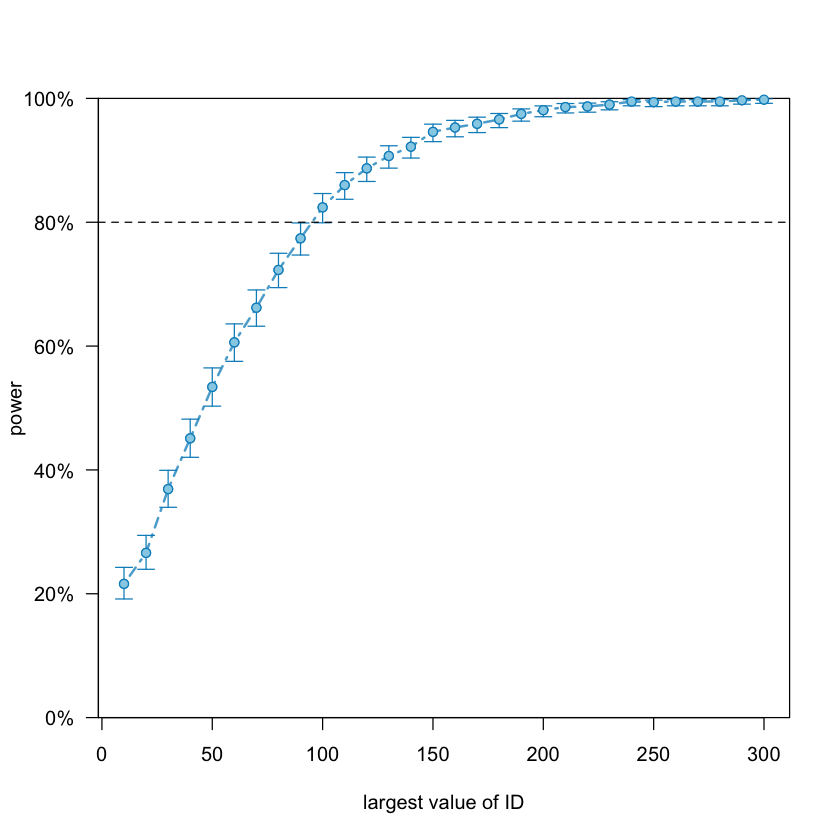

In [54]:
print(pc2)
plot(pc2)

In [55]:
write.csv(summary(pc2),"../../data/artifacts/mixed_effects-power_simulation-alpha=0.05.csv")